<a href="https://colab.research.google.com/github/HaripriyaR02/YouTube-AdView-Prediction/blob/main/YouTube_AdView_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**YouTube AdView Prediction**</center>


In [147]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [148]:
path = "/content/train.csv"
data_train = pd.read_csv("train.csv")

In [149]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [150]:
data_train.shape

(14999, 9)

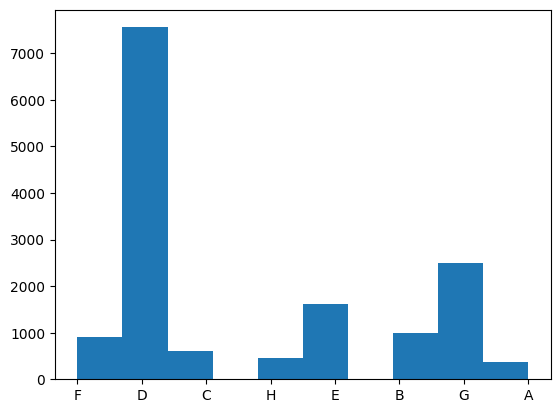

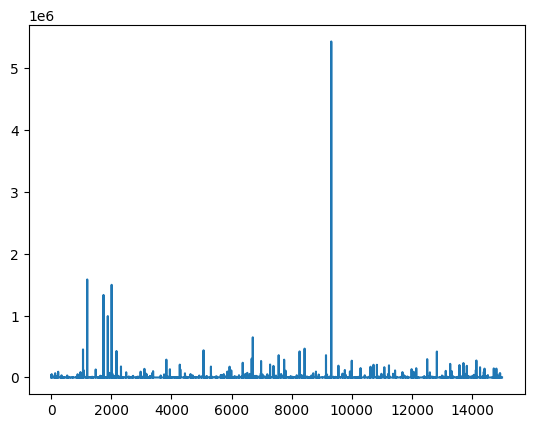

In [151]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [152]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

In [153]:
data_train['comment'] = data_train['comment'].replace('F', np.nan)

<ipython-input-153-04723df5ff25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['comment'] = data_train['comment'].replace('F', np.nan)


In [154]:
data_train_numeric = data_train.drop(['vidid', 'category','published','duration'], axis=1)
data_train_numeric



,adview,views,likes,dislikes,comment
0,40,1031602,8523,363,1095
1,2,1707,56,2,6
2,1,2023,25,0,2
3,6,620860,777,161,153
4,1,666,1,0,0
...,...,...,...,...,...
14994,2,525949,1137,83,86
14995,1,665673,3849,156,569
14996,4,3479,16,1,1
14997,1,963,0,0,0


In [155]:
# Convert the entire DataFrame to integers, handling errors
data_train_numeric = data_train_numeric.apply(pd.to_numeric, errors='coerce')

# Remove rows where conversion to integer failed (rows with NaN values)
data_train_numeric = data_train_numeric.dropna()

# Convert the entire DataFrame to integer type
data_train_numeric = data_train_numeric.astype(int)

# Print the DataFrame after conversion
data_train_numeric.dtypes

adview      int64
views       int64
likes       int64
dislikes    int64
comment     int64
dtype: object

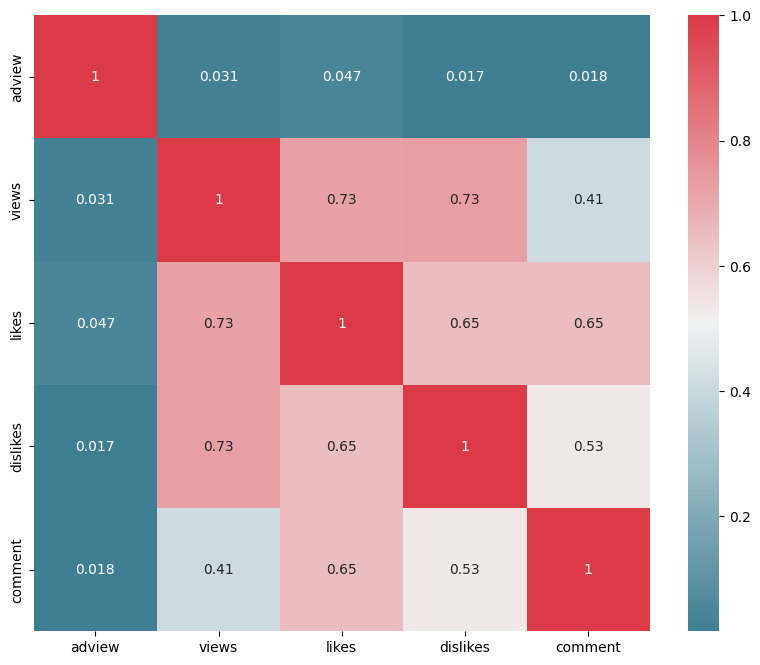

In [156]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(10, 8))
corr = data_train_numeric.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()



In [157]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [158]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [159]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [160]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

In [161]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

In [162]:
train=pd.read_csv("train.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5996,40,1031602,8523,363,1095.0,2169,457,6
1,2799,2,1707,56,2,6.0,2186,570,4
2,8231,1,2023,25,0,2.0,2095,136,3
3,9098,6,620860,777,161,153.0,2120,262,8
4,123,1,666,1,0,0.0,2092,31,4


In [163]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

X_train.shape


(11872, 7)

In [164]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

nan

In [165]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [166]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Impute missing values in training and testing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [167]:
# Train the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train_imputed, y_train)



LinearRegression()

In [168]:
# Evaluate the model
print_error(X_test_imputed, y_test, linear_regression)

Mean Absolute Error: 3445.215252152858
Mean Squared Error: 323071428.4128711
Root Mean Squared Error: 17974.187837364756


In [169]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Impute missing values in training and testing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [170]:
# Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train_imputed, y_train)
print_error(X_test_imputed, y_test, decision_tree)

Mean Absolute Error: 3661.2593465813407
Mean Squared Error: 1866446727.018188
Root Mean Squared Error: 43202.39260756501


In [171]:
# Random Forest Regressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train_imputed, y_train)
print_error(X_test_imputed, y_test, random_forest)

<ipython-input-171-66ee4effc4fa>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_imputed, y_train)


Mean Absolute Error: 2802.8655852577244
Mean Squared Error: 289790684.4376543
Root Mean Squared Error: 17023.239540042145


In [172]:
data_train.columns

Index(['views', 'likes', 'dislikes', 'comment', 'published', 'duration',
       'category'],
      dtype='object')

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import keras
from keras.layers import Dense

X = data_train_numeric.drop(columns=['adview'])  # Features
y = data_train_numeric['adview']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Impute missing values in testing data
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

In [174]:
# Define the Artificial Neural Network model
ann = keras.models.Sequential([
    Dense(6, activation="relu", input_shape=X_train.shape[1:]),
    Dense(6, activation="relu"),
    Dense(1)
])

optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error"])

In [175]:
# Train the model
history = ann.fit(X_train, y_train, epochs=100, verbose=1)

# Print the model summary
ann.summary()

Epoch 1/100
366/366 [==============================] - 2s 3ms/step - loss: 767407424.0000 - mean_squared_error: 767407424.0000
Epoch 2/100
366/366 [==============================] - 1s 3ms/step - loss: 767405440.0000 - mean_squared_error: 767405440.0000
Epoch 3/100
366/366 [==============================] - 1s 3ms/step - loss: 767400896.0000 - mean_squared_error: 767400896.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767391488.0000 - mean_squared_error: 767391488.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767376640.0000 - mean_squared_error: 767376640.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767357312.0000 - mean_squared_error: 767357312.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767330752.0000 - mean_squared_error: 767330752.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767295872.0000 - mean_squared_error:

In [176]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [177]:
data_test = pd.read_csv("test.csv")

In [178]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [179]:
from keras.models import load_model
model = load_model("/content/ann_youtubeadview.h5")

In [180]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [181]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [182]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [183]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [184]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

In [185]:
train=pd.read_csv("test.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,457,2
1,3444,1040132,8171,340,1047,1825,570,6
2,1593,28534,31,11,1,1009,136,4
3,3775,1316715,2284,250,274,116,262,7
4,7644,1893173,2519,225,116,1892,31,2


In [186]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,457,2
1,1040132,8171,340,1047,1825,570,6
2,28534,31,11,1,1009,136,4
3,1316715,2284,250,274,116,262,7
4,1893173,2519,225,116,1892,31,2


In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [188]:
print(X_test.shape)


(8549, 7)


In [189]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Adjust according to your output


In [190]:
X_test = X_test[:, :4]  # Select only the first 4 features


In [191]:
prediction = model.predict(X_test)


268/268 [==============================] - 0s 1ms/step


In [192]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Example model definition (adjust according to your actual model)
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Adjust according to your output

# Example test data (replace with your actual X_test)
X_test = np.random.rand(10, 7)  # Example data with shape (10, 7)

# Check the shape of X_test
print("Original X_test shape:", X_test.shape)

# Adjust X_test to have the correct number of features
X_test = X_test[:, :4]  # Select only the first 4 features

# Check the new shape of X_test
print("Adjusted X_test shape:", X_test.shape)

# Predict using the model
prediction = model.predict(X_test)
print("Prediction:", prediction)


Original X_test shape: (10, 7)
Adjusted X_test shape: (10, 4)
1/1 [==============================] - 0s 57ms/step
Prediction: [[0.50686896]
 [0.5076952 ]
 [0.53246486]
 [0.5396755 ]
 [0.49957576]
 [0.5565357 ]
 [0.5424528 ]
 [0.52107304]
 [0.52953494]
 [0.4992972 ]]


In [193]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float32
dtypes: float32(1)
memory usage: 168.0 bytes


In [194]:
prediction = prediction.rename(columns={0: "Adview"})

In [195]:
prediction.head()

,Adview
0,0.506869
1,0.507695
2,0.532465
3,0.539675
4,0.499576


In [196]:
prediction.to_csv('predictions.csv')